In [1]:
#Se importan las librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
#Se hacen Nan los datos nulos
sentinels = {'Precipitación': ['Nulo'],'Evaporación':['Nulo'],'TMáx':['Nulo'],'TMín':['Nulo']}

In [3]:
#Se lee la tabla.
df0 = pd.read_csv('Alamos.txt', skiprows = 20, sep='\s+', header = None, names = ["Día/Mes/Año", "Precipitación", "Evaporación", "TMáx", "TMín"], na_values=sentinels)
sns.set(rc={'figure.figsize':(12,8.27)})

In [4]:
#Se cambia las fechas a variable temporal.
df0['Fecha'] = pd.to_datetime(df0.apply(lambda x: x['Día/Mes/Año'], 1),dayfirst =True)

In [5]:
#Se elimina la primera columna.
df0 = df0.drop(['Día/Mes/Año'],axis = 1)

In [6]:
#Se crearán columnas para los meses y años.
df0['Mes'] = df0['Fecha'].dt.month
df0['Año'] = df0['Fecha'].dt.year
df0.head()

,Precipitación,Evaporación,TMáx,TMín,Fecha,Mes,Año
0,0.0,2.0,22.5,6.0,1961-01-01,1,1961
1,0.0,1.1,25.0,9.0,1961-01-02,1,1961
2,0.0,3.4,27.5,9.0,1961-01-03,1,1961
3,0.0,2.4,27.5,11.0,1961-01-04,1,1961
4,7.4,6.0,22.0,13.5,1961-01-05,1,1961


In [7]:
#Se checan los tipos de datos.
df0.dtypes

Precipitación           float64
Evaporación             float64
TMáx                    float64
TMín                    float64
Fecha            datetime64[ns]
Mes                       int64
Año                       int64
dtype: object

In [8]:
#Se calcula el número de heladas.
d1=[]
d2=[]
for i in range (0,24):
    inicio = 1961
    Años = inicio + i
    Noches = df0[df0.Año==Años].TMín
    Heladas = len([1 for x in Noches if x<0])
    d1.append(Años)
    d2.append(Heladas)
df1 = pd.DataFrame({"Año" : d1, "NochesHeladas" : d2})
df1

,Año,NochesHeladas
0,1961,0
1,1962,0
2,1963,0
3,1964,0
4,1965,0
5,1966,0
6,1967,0
7,1968,0
8,1969,0
9,1970,0


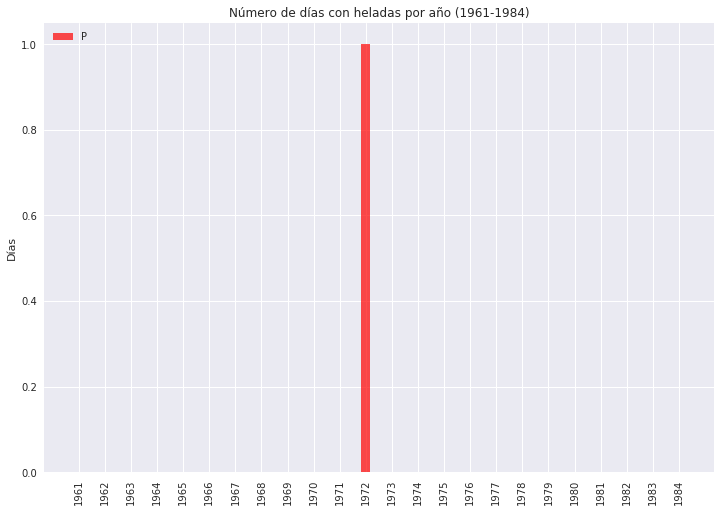

In [9]:
#Se grafican los días con heladas por año.
inicio = 1961
Años = [inicio + i for i in range (0,24)]
fecha = Años
PRECIPANUAL = df1.NochesHeladas

width = np.min(np.diff(fecha))/3

#Graficando
plt.bar(fecha-width, PRECIPANUAL,width,align='center', alpha=0.7, color = 'red')
plt.xticks(fecha-width, Años, size = 'small', rotation = 90)
plt.ylabel('Días')
plt.title('Número de días con heladas por año (1961-1984)')
plt.gca().legend(('PMANUAL'),frameon=False,loc='upper left')
plt.savefig('heladas',plt=2000)
plt.show()

In [10]:
#Se calcula el número de días de verano.
d3=[]
d4=[]
for i in range (0,24):
    inicio = 1961
    Años = inicio + i
    Días = df0[df0.Año==Años].TMáx
    Verano = len([1 for x in Días if x>25])
    d3.append(Años)
    d4.append(Verano)
df2 = pd.DataFrame({"Año" : d3, "DíasDeVerano" : d4})
df2

,Año,DíasDeVerano
0,1961,324
1,1962,305
2,1963,338
3,1964,325
4,1965,322
5,1966,0
6,1967,338
7,1968,314
8,1969,346
9,1970,343


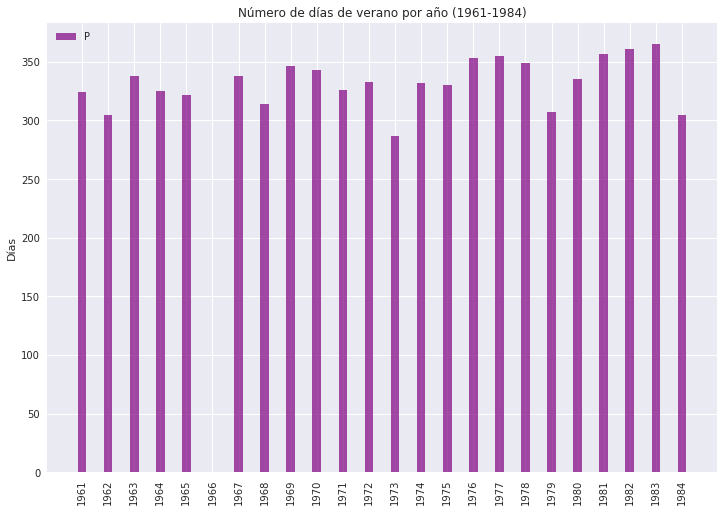

In [41]:
#Se grafican los días de verano por año.
inicio = 1961
Años = [inicio + i for i in range (0,24)]
fecha = Años
PRECIPANUAL = df2.DíasDeVerano

width = np.min(np.diff(fecha))/3

#Graficando
plt.bar(fecha-width, PRECIPANUAL,width,align='center', alpha=0.7, color = 'purple')
plt.xticks(fecha-width, Años, size = 'small', rotation = 90)
plt.ylabel('Días')
plt.title('Número de días de verano por año (1961-1984)')
plt.gca().legend(('PMANUAL'),frameon=False,loc='upper left')
plt.savefig('verano',plt=2000)
plt.show()

In [12]:
#Se calcula el número de días de verano.
d5=[]
d6=[]
for i in range (0,24):
    inicio = 1961
    Años = inicio + i
    Noches = df0[df0.Año==Años].TMín
    Tropicales = len([1 for x in Noches if x>20])
    d5.append(Años)
    d6.append(Tropicales)
df3 = pd.DataFrame({"Año" : d5, "NochesTropicales" : d6})
df3

,Año,NochesTropicales
0,1961,114
1,1962,120
2,1963,118
3,1964,116
4,1965,80
5,1966,0
6,1967,66
7,1968,66
8,1969,110
9,1970,87


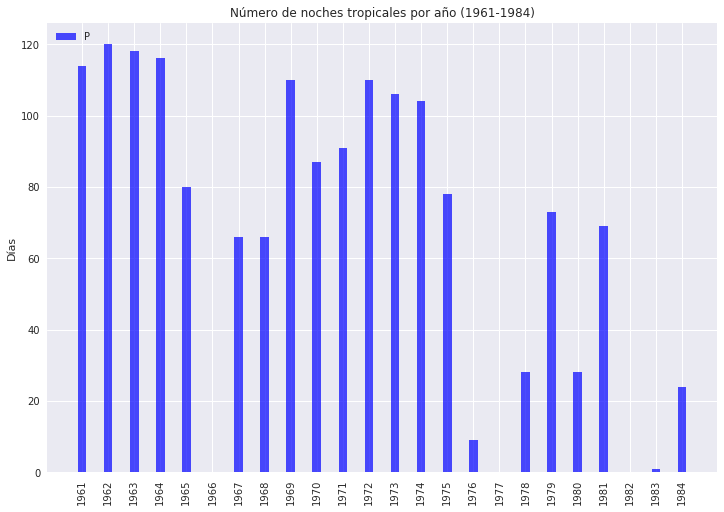

In [42]:
#Se grafican las noches tropicales por año.
inicio = 1961
Años = [inicio + i for i in range (0,24)]
fecha = Años
PRECIPANUAL = df3.NochesTropicales

width = np.min(np.diff(fecha))/3

#Graficando
plt.bar(fecha-width, PRECIPANUAL,width,align='center', alpha=0.7, color = 'blue')
plt.xticks(fecha-width, Años, size = 'small', rotation = 90)
plt.ylabel('Días')
plt.title('Número de noches tropicales por año (1961-1984)')
plt.gca().legend(('PMANUAL'),frameon=False,loc='upper left')
plt.savefig('tropicales',plt=2000)
plt.show()

In [14]:
#Se calcula la máxima mensual de la temperatura máxima.
d7=[]
d8=[]
for i in range (0,12):
    inicio = 1
    Meses = inicio + i
    TMáxMáx = df0[df0.Mes==Meses].TMáx.max()
    d7.append(Meses)
    d8.append(TMáxMáx)
df4 = pd.DataFrame({"Mes" : d7, "TemperaturaMáxima" : d8})
df4

,Mes,TemperaturaMáxima
0,1,41.5
1,2,44.0
2,3,44.0
3,4,43.0
4,5,48.0
5,6,49.5
6,7,45.5
7,8,44.0
8,9,46.0
9,10,43.0


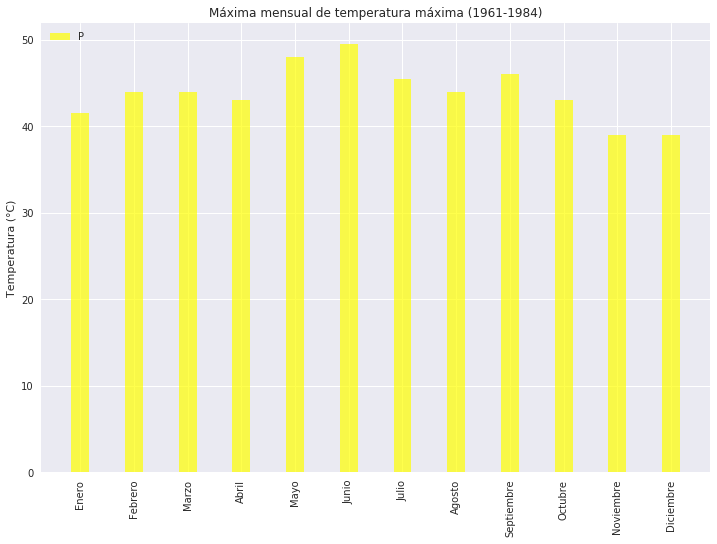

In [45]:
#Se grafican las máximas mensuales de las temperaturas máximas.
DesMois = ('Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre')
inicio = 1
Meses = [inicio + i for i in range (0,12)]
fecha = Meses
PRECIPMENSUAL = df4.TemperaturaMáxima

#Calculando anchura óptima
width = np.min(np.diff(fecha))/3

#Graficando
plt.bar(fecha-width, PRECIPMENSUAL,width,align='center', alpha=0.7, color = 'yellow')
plt.xticks(fecha-width, DesMois, size = 'small', rotation = 90)
plt.ylabel('Temperatura (°C)')
plt.title('Máxima mensual de temperatura máxima (1961-1984)')
plt.gca().legend(('PMENSUAL'),frameon=False,loc='upper left')
plt.savefig('MaximasMensualesMax',plt=2000)
plt.show()

In [16]:
#Se calcula la máxima mensual de la temperatura mínima.
d9=[]
d10=[]
for i in range (0,12):
    inicio = 1
    Meses = inicio + i
    TMínMáx = df0[df0.Mes==Meses].TMín.max()
    d9.append(Meses)
    d10.append(TMínMáx)
df5 = pd.DataFrame({"Mes" : d9, "TemperaturaMínima" : d10})
df5

,Mes,TemperaturaMínima
0,1,17.5
1,2,19.0
2,3,20.0
3,4,23.0
4,5,26.0
5,6,28.0
6,7,27.0
7,8,26.8
8,9,26.5
9,10,24.5


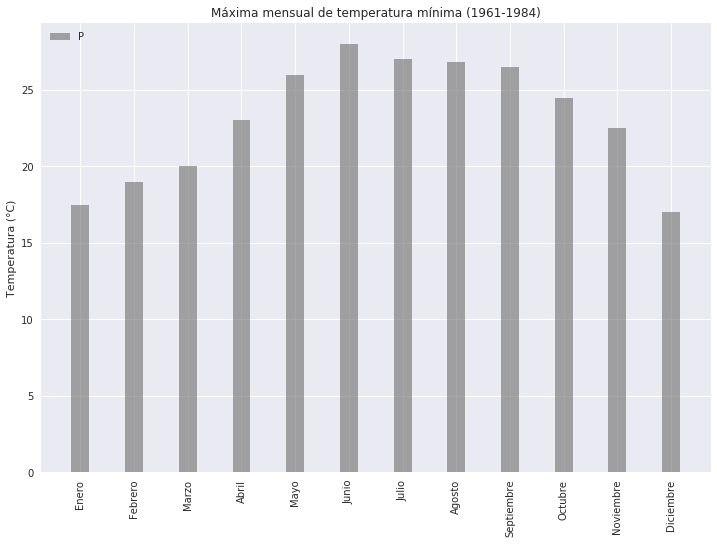

In [46]:
#Se grafican las máximas mensuales de las temperaturas mínimas.
DesMois = ('Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre')
inicio = 1
Meses = [inicio + i for i in range (0,12)]
fecha = Meses
PRECIPMENSUAL = df5.TemperaturaMínima

#Calculando anchura óptima
width = np.min(np.diff(fecha))/3

#Graficando
plt.bar(fecha-width, PRECIPMENSUAL,width,align='center', alpha=0.7, color = 'gray')
plt.xticks(fecha-width, DesMois, size = 'small', rotation = 90)
plt.ylabel('Temperatura (°C)')
plt.title('Máxima mensual de temperatura mínima (1961-1984)')
plt.gca().legend(('PMENSUAL'),frameon=False,loc='upper left')
plt.savefig('MaximasMensualesMin',plt=2000)
plt.show()

In [18]:
#Se calcula la mínima mensual de la temperatura máxima.
d11=[]
d12=[]
for i in range (0,12):
    inicio = 1
    Meses = inicio + i
    TMáxMín = df0[df0.Mes==Meses].TMáx.min()
    d11.append(Meses)
    d12.append(TMáxMín)
df6 = pd.DataFrame({"Mes" : d11, "TemperaturaMáxima" : d12})
df6

,Mes,TemperaturaMáxima
0,1,14.5
1,2,15.5
2,3,16.5
3,4,21.0
4,5,27.0
5,6,29.0
6,7,27.5
7,8,23.0
8,9,25.0
9,10,21.0


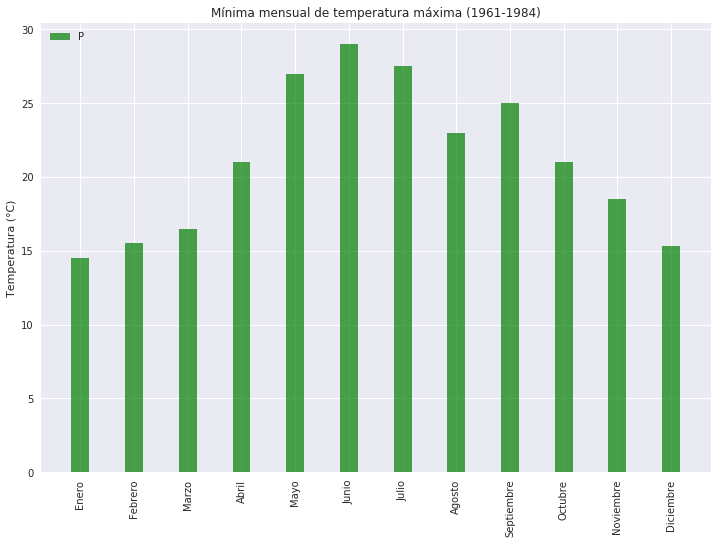

In [47]:
#Se grafican las mínimas mensuales de las temperaturas máximas.
DesMois = ('Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre')
inicio = 1
Meses = [inicio + i for i in range (0,12)]
fecha = Meses
PRECIPMENSUAL = df6.TemperaturaMáxima

#Calculando anchura óptima
width = np.min(np.diff(fecha))/3

#Graficando
plt.bar(fecha-width, PRECIPMENSUAL,width,align='center', alpha=0.7, color = 'green')
plt.xticks(fecha-width, DesMois, size = 'small', rotation = 90)
plt.ylabel('Temperatura (°C)')
plt.title('Mínima mensual de temperatura máxima (1961-1984)')
plt.gca().legend(('PMENSUAL'),frameon=False,loc='upper left')
plt.savefig('MinimasMensualesMax',plt=2000)
plt.show()

In [20]:
#Se calcula la mínima mensual de la temperatura mínima.
d13=[]
d14=[]
for i in range (0,12):
    inicio = 1
    Meses = inicio + i
    TMínMín = df0[df0.Mes==Meses].TMín.min()
    d13.append(Meses)
    d14.append(TMínMín)
df7 = pd.DataFrame({"Mes" : d13, "TemperaturaMínima" : d14})
df7

,Mes,TemperaturaMínima
0,1,0.0
1,2,-4.0
2,3,2.0
3,4,5.0
4,5,6.5
5,6,8.0
6,7,9.0
7,8,9.5
8,9,1.3
9,10,6.5


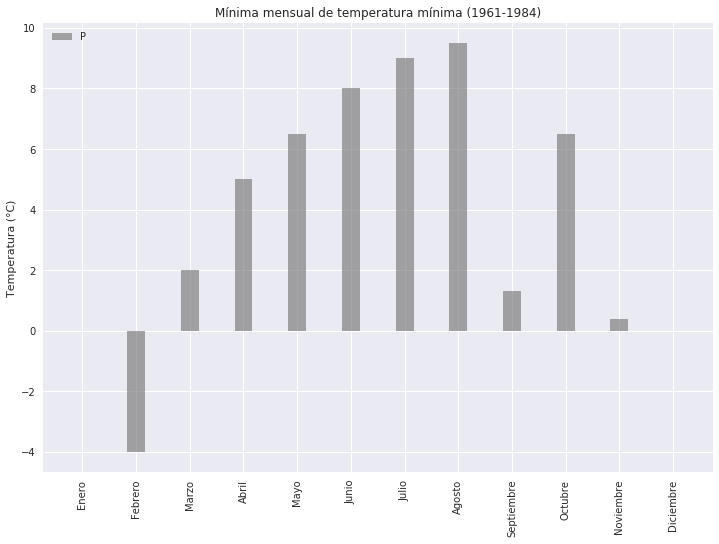

In [48]:
#Se grafican las mínimas mensuales de las temperaturas máximas.
DesMois = ('Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre')
inicio = 1
Meses = [inicio + i for i in range (0,12)]
fecha = Meses
PRECIPMENSUAL = df7.TemperaturaMínima

#Calculando anchura óptima
width = np.min(np.diff(fecha))/3

#Graficando
plt.bar(fecha-width, PRECIPMENSUAL,width,align='center', alpha=0.7, color = 'gray')
plt.xticks(fecha-width, DesMois, size = 'small', rotation = 90)
plt.ylabel('Temperatura (°C)')
plt.title('Mínima mensual de temperatura mínima (1961-1984)')
plt.gca().legend(('PMENSUAL'),frameon=False,loc='upper left')
plt.savefig('MinimasMensualesMin',plt=2000)
plt.show()

In [22]:
#Se calcula el promedio de diferencia de temperaturas (máxima menos mínima)
d15 =[]
d16 =[]
df8 = pd.DataFrame({"Dif" : df0.TMáx - df0.TMín})
for i in range (0,12):
    inicio = 1
    Meses = inicio + i
    PromDif = df8[df0.Mes==Meses].Dif.mean()
    d15.append(Meses)
    d16.append(PromDif)
df9 = pd.DataFrame({"Mes" : d15, "PromedioDeDiferencia" : d16})
df9

,Mes,PromedioDeDiferencia
0,1,18.653652
1,2,19.303846
2,3,19.994913
3,4,20.839246
4,5,21.171108
5,6,19.784157
6,7,16.412482
7,8,15.087658
8,9,16.735072
9,10,19.258504


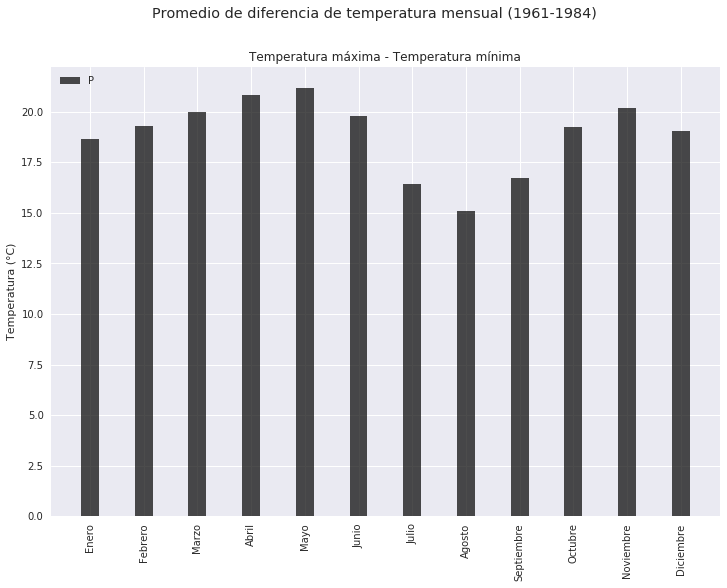

In [23]:
#Se grafican los promedios de diferencias de temperaturas.
DesMois = ('Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre')
inicio = 1
Meses = [inicio + i for i in range (0,12)]
fecha = Meses
PRECIPMENSUAL = df9.PromedioDeDiferencia

#Calculando anchura óptima
width = np.min(np.diff(fecha))/3

#Graficando
plt.bar(fecha-width, PRECIPMENSUAL,width,align='center', alpha=0.7, color = 'black')
plt.xticks(fecha-width, DesMois, size = 'small', rotation = 90)
plt.ylabel('Temperatura (°C)')
plt.suptitle('Promedio de diferencia de temperatura mensual (1961-1984)')
plt.title('Temperatura máxima - Temperatura mínima')
plt.gca().legend(('PMENSUAL'),frameon=False,loc='upper left')
plt.savefig('DifP',plt=2000)
plt.show()

In [24]:
#Se calcula la precipitación máxima mensual.
d17=[]
d18=[]
for i in range (0,12):
    inicio = 1
    Meses = inicio + i
    PrecipMáx = df0[df0.Mes==Meses].Precipitación.max()
    d17.append(Meses)
    d18.append(PrecipMáx)
df10 = pd.DataFrame({"Mes" : d17, "PrecipitaciónMáxima" : d18})
df10

,Mes,PrecipitaciónMáxima
0,1,82.0
1,2,57.5
2,3,123.5
3,4,14.0
4,5,20.0
5,6,51.8
6,7,133.5
7,8,152.0
8,9,102.0
9,10,95.0


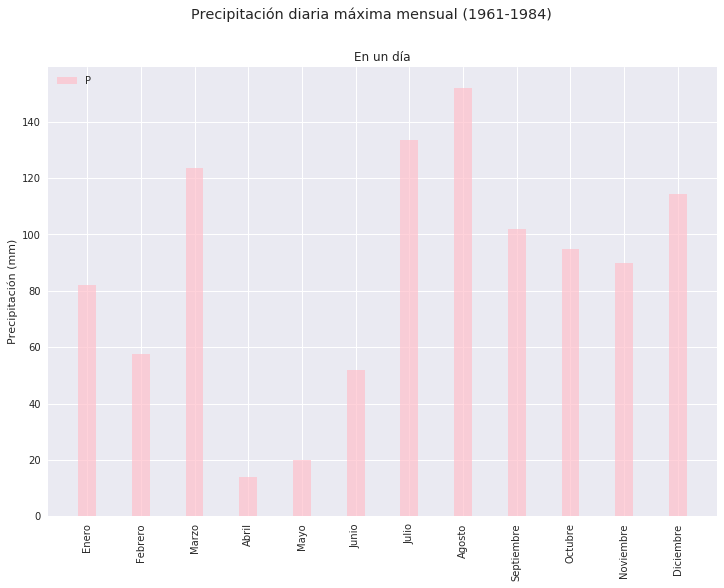

In [49]:
#Se grafican las precipitaciones máximas mensuales.
DesMois = ('Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre')
inicio = 1
Meses = [inicio + i for i in range (0,12)]
fecha = Meses
PRECIPMENSUAL = df10.PrecipitaciónMáxima

#Calculando anchura óptima
width = np.min(np.diff(fecha))/3

#Graficando
plt.bar(fecha-width, PRECIPMENSUAL,width,align='center', alpha=0.7, color = 'pink')
plt.xticks(fecha-width, DesMois, size = 'small', rotation = 90)
plt.ylabel('Precipitación (mm)')
plt.suptitle('Precipitación diaria máxima mensual (1961-1984)')
plt.title('En un día')
plt.gca().legend(('PMENSUAL'),frameon=False,loc='upper left')
plt.savefig('PrecipMax',plt=2000)
plt.show()

In [39]:
#Se calcula la precipitación máxima mensual en cinco días consecutivos.
d30 = []
d31 = []
d32 = []
nmax = []
temp = []
n = []
meses = []
for i in range (0,24):
    df15 = pd.DataFrame({"Mes": df0[df0.Año==(1961+i)].Mes, "Precip": df0[df0.Año==(1961+i)].Precipitación})
    for j in range (0,12):
        temp.append(j+1)
        df16 = pd.DataFrame({"Precip": df15[df15.Mes==j+1].Precip})
        k = len (df16)
        df16.index = np.arange(0,k)
        for c in range (0,k-5):
            j1=df16.Precip[c]
            j2=df16.Precip[c+1]
            j3=df16.Precip[c+2]
            j4=df16.Precip[c+3]
            j5=df16.Precip[c+4]
            if (j1 !=0.0 and j2 !=0.0 and j3 !=0.0 and j4 !=0.0 and j5 !=0.0):
                v = j1+j2+j3+j4+j5
                j1=j2=j3=j4=j5=0
                d31.append(v)
            else:
                d31.append(0)
        df17 = pd.DataFrame({"Pre" : d31})
        s = df17.Pre.max()
        nmax.append(s)
        d31 = []
for i in range (0,24):
    for x in range (0,12):
        meses.append(x+1)
df18 = pd.DataFrame({"Mes" : meses, "PreMáx" : nmax})
meses = []
temp = []
for i in range (0,12):
    temp.append(i+1)
    l = df18[df18.Mes==i+1].PreMáx.max()
    meses.append(l)
df19 = pd.DataFrame({"Mes" : temp, "PMáx" : meses})
df19

,Mes,PMáx
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
5,6,0.0
6,7,118.1
7,8,181.7
8,9,35.6
9,10,0.0


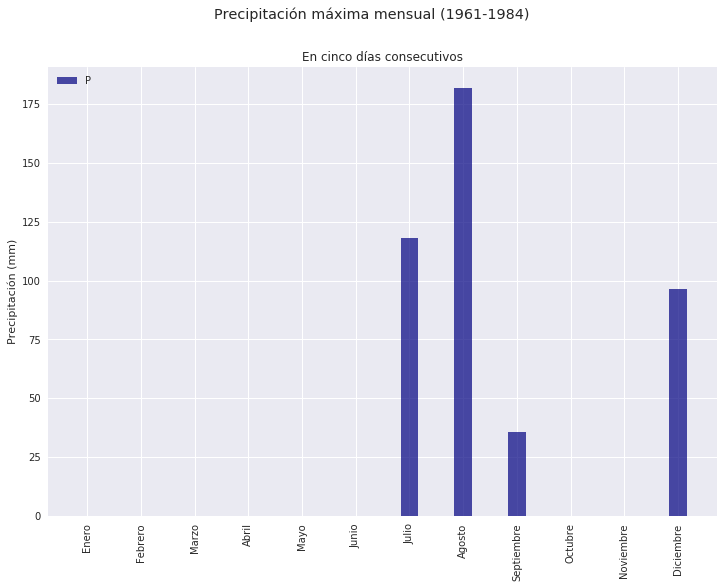

In [50]:
#Se grafican la precipitación máxima mensual en cinco días consecutivos.
DesMois = ('Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre')
inicio = 1
Meses = [inicio + i for i in range (0,12)]
fecha = Meses
PRECIPMENSUAL = df19.PMáx

#Calculando anchura óptima
width = np.min(np.diff(fecha))/3

#Graficando
plt.bar(fecha-width, PRECIPMENSUAL,width,align='center', alpha=0.7, color = 'navy')
plt.xticks(fecha-width, DesMois, size = 'small', rotation = 90)
plt.ylabel('Precipitación (mm)')
plt.suptitle('Precipitación máxima mensual (1961-1984)')
plt.title('En cinco días consecutivos')
plt.gca().legend(('PMENSUAL'),frameon=False,loc='upper left')
plt.savefig('PrecipMaxConse',plt=2000)
plt.show()

In [27]:
#Se calcula el número de días cada año cuya precipitación sea mayor o igual a 1 mm.
d19=[]
d20=[]
for i in range (0,24):
    inicio = 1961
    Años = inicio + i
    Precip = df0[df0.Año==Años].Precipitación
    pre1 = len([1 for x in Precip if x>=1])
    d19.append(Años)
    d20.append(pre1)
df11 = pd.DataFrame({"Año" : d19, "Precim1" : d20})
df11

,Año,Precim1
0,1961,54
1,1962,48
2,1963,52
3,1964,46
4,1965,49
5,1966,0
6,1967,55
7,1968,50
8,1969,36
9,1970,38


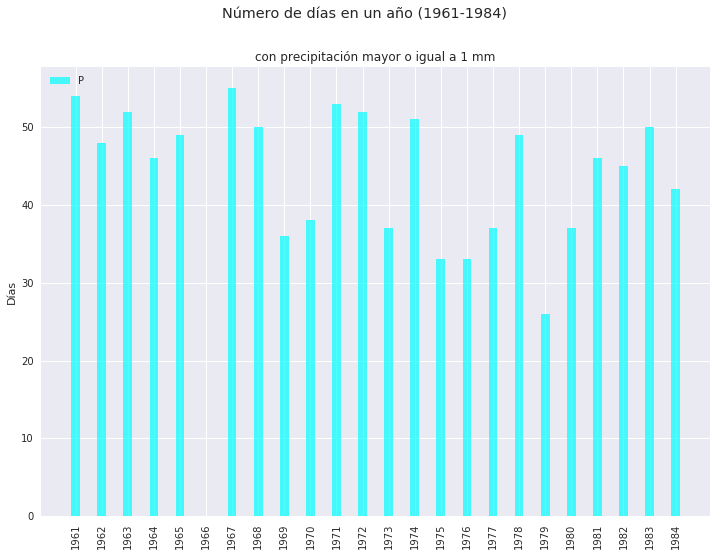

In [51]:
#Se grafica el número de días con precipitación mayor o igual a 1 mm.
inicio = 1961
Años = [inicio + i for i in range (0,24)]
fecha = Años
PRECIPANUAL = df11.Precim1

width = np.min(np.diff(fecha))/3

#Graficando
plt.bar(fecha-width, PRECIPANUAL,width,align='center', alpha=0.7, color = 'cyan')
plt.xticks(fecha-width, Años, size = 'small', rotation = 90)
plt.ylabel('Días')
plt.suptitle('Número de días en un año (1961-1984)')
plt.title('con precipitación mayor o igual a 1 mm')
plt.gca().legend(('PMANUAL'),frameon=False,loc='upper left')
plt.savefig('P1',plt=2000)
plt.show()

In [29]:
#Se calcula el número de días cada año cuya precipitación sea mayor o igual a 10 mm.
d21=[]
d22=[]
for i in range (0,24):
    inicio = 1961
    Años = inicio + i
    Precip2 = df0[df0.Año==Años].Precipitación
    pre10 = len([1 for x in Precip2 if x>=10])
    d21.append(Años)
    d22.append(pre10)
df12 = pd.DataFrame({"Año" : d21, "Precim2" : d22})
df12

,Año,Precim2
0,1961,22
1,1962,18
2,1963,24
3,1964,17
4,1965,23
5,1966,0
6,1967,22
7,1968,25
8,1969,17
9,1970,16


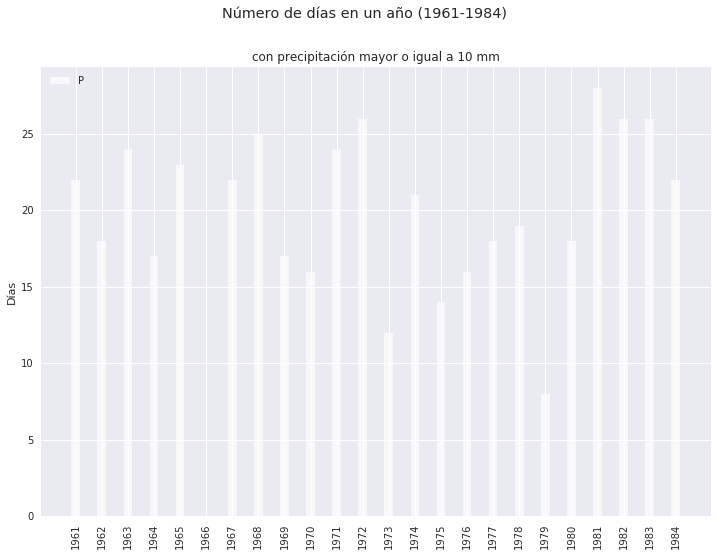

In [52]:
#Se grafica el número de días con precipitación mayor o igual a 10 mm.
inicio = 1961
Años = [inicio + i for i in range (0,24)]
fecha = Años
PRECIPANUAL = df12.Precim2

width = np.min(np.diff(fecha))/3

#Graficando
plt.bar(fecha-width, PRECIPANUAL,width,align='center', alpha=0.7, color = 'white')
plt.xticks(fecha-width, Años, size = 'small', rotation = 90)
plt.ylabel('Días')
plt.suptitle('Número de días en un año (1961-1984)')
plt.title('con precipitación mayor o igual a 10 mm')
plt.gca().legend(('PMANUAL'),frameon=False,loc='upper left')
plt.savefig('P10',plt=2000)
plt.show()

In [31]:
#Se calcula el número de días cada año cuya precipitación sea mayor o igual a 20 mm.
d23=[]
d24=[]
for i in range (0,24):
    inicio = 1961
    Años = inicio + i
    Precip3 = df0[df0.Año==Años].Precipitación
    pre20 = len([1 for x in Precip3 if x>=20])
    d23.append(Años)
    d24.append(pre20)
df13 = pd.DataFrame({"Año" : d23, "Precim3" : d24})
df13

,Año,Precim3
0,1961,12
1,1962,13
2,1963,14
3,1964,10
4,1965,14
5,1966,0
6,1967,11
7,1968,13
8,1969,10
9,1970,8


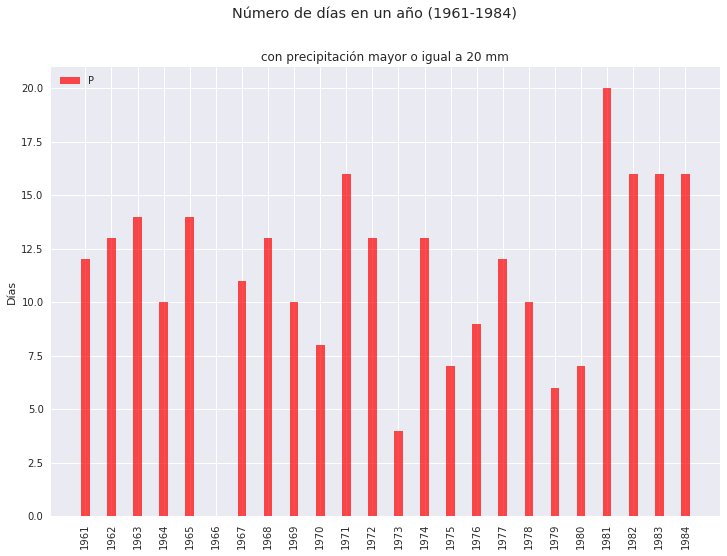

In [53]:
#Se grafica el número de días con precipitación mayor o igual a 20 mm.
inicio = 1961
Años = [inicio + i for i in range (0,24)]
fecha = Años
PRECIPANUAL = df13.Precim3

width = np.min(np.diff(fecha))/3

#Graficando
plt.bar(fecha-width, PRECIPANUAL,width,align='center', alpha=0.7, color = 'red')
plt.xticks(fecha-width, Años, size = 'small', rotation = 90)
plt.ylabel('Días')
plt.suptitle('Número de días en un año (1961-1984)')
plt.title('con precipitación mayor o igual a 20 mm')
plt.gca().legend(('PMANUAL'),frameon=False,loc='upper left')
plt.savefig('P20',plt=2000)
plt.show()

In [33]:
# Se calcula el número de días secos consecutivos, es decir, días cuya precipitación fuera nula o menor a 1 mm.
DSC = []
d28 = []
n = 0
nmax = 0
for i in range(df0["Año"][0],df0["Año"][len(df0)-1]+1):
    for j in range(0,len(df0)):
        if(df0["Año"][j] == i):
            if(df0["Precipitación"][j]<1):
                n = n+1
            elif(df0["Precipitación"][j]>=1):
                if(n > nmax):
                    nmax = n
                    n = 0
                else:
                    n = 0
    DSC.append(nmax)
    nmax = 0
    n = 0
inicio = 1961
Años = [inicio + i for i in range (0,24)]
d28.append(Años)
df14 = pd.DataFrame({"Año": Años, "DíasSecosConsecutivos" : DSC})
df14

,Año,DíasSecosConsecutivos
0,1961,72
1,1962,73
2,1963,133
3,1964,58
4,1965,110
5,1966,0
6,1967,123
7,1968,71
8,1969,130
9,1970,93


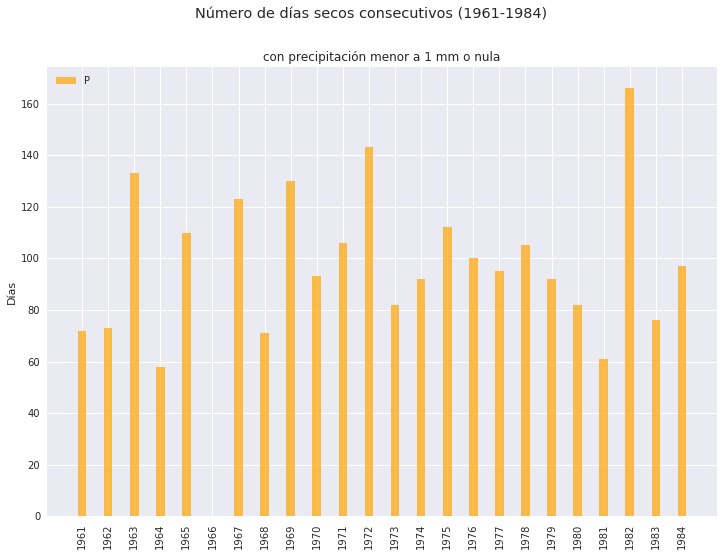

In [54]:
#Se grafica el número de días secos consecutivos.
inicio = 1961
Años = [inicio + i for i in range (0,24)]
fecha = Años
PRECIPANUAL = df14.DíasSecosConsecutivos

width = np.min(np.diff(fecha))/3

#Graficando
plt.bar(fecha-width, PRECIPANUAL,width,align='center', alpha=0.7, color = 'orange')
plt.xticks(fecha-width, Años, size = 'small', rotation = 90)
plt.ylabel('Días')
plt.suptitle('Número de días secos consecutivos (1961-1984)')
plt.title('con precipitación menor a 1 mm o nula')
plt.gca().legend(('PMANUAL'),frameon=False,loc='upper left')
plt.savefig('SecosConse',plt=2000)
plt.show()

In [56]:
# Se calcula el número de días húmedos consecutivos, es decir, días cuya precipitación fuera mayor o igual a 1 mm.
DHC = []
d29 = []
n = 0
nmax = 0
for i in range(df0["Año"][0],df0["Año"][len(df0)-1]+1):
    for j in range(0,len(df0)):
        if(df0["Año"][j] == i):
            if(df0["Precipitación"][j]>=1):
                n = n+1
            elif(df0["Precipitación"][j]<1):
                if(n > nmax):
                    nmax = n
                    n = 0
                else:
                    n = 0
    DHC.append(nmax)
    nmax = 0
    n = 0
inicio = 1961
Años = [inicio + i for i in range (0,24)]
d29.append(Años)
df15 = pd.DataFrame({"Año": Años, "DíasHúmedosConsecutivos" : DHC})
df15

,Año,DíasHúmedosConsecutivos
0,1961,4
1,1962,3
2,1963,6
3,1964,5
4,1965,5
5,1966,0
6,1967,6
7,1968,5
8,1969,3
9,1970,4


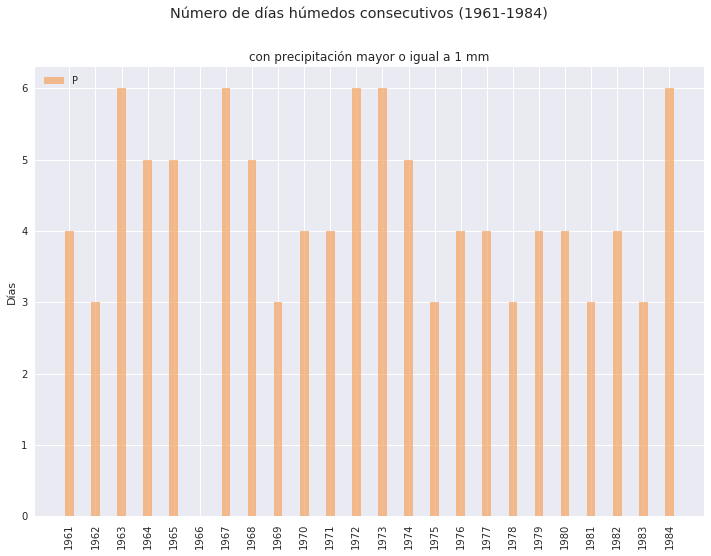

In [57]:
#Se grafica el número de días húmedos consecutivos.
inicio = 1961
Años = [inicio + i for i in range (0,24)]
fecha = Años
PRECIPANUAL = df15.DíasHúmedosConsecutivos

width = np.min(np.diff(fecha))/3

#Graficando
plt.bar(fecha-width, PRECIPANUAL,width,align='center', alpha=0.7, color = 'sandybrown')
plt.xticks(fecha-width, Años, size = 'small', rotation = 90)
plt.ylabel('Días')
plt.suptitle('Número de días húmedos consecutivos (1961-1984)')
plt.title('con precipitación mayor o igual a 1 mm')
plt.gca().legend(('PMANUAL'),frameon=False,loc='upper left')
plt.savefig('HumedosConse',plt=2000)
plt.show()